## EDA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('function_assignment.csv')
df.head()

,function,job_title,jds
0,Sales/ Business Development/ Account Management,Head - Digital Portfolio,NaN
1,IT/ Information Technology,Software Head,10-15 years of experience in a VFX facility Ad...
2,Software Architecting,iPhone Developers,Candidate Should have Strong OO design and pro...
3,Software Architecting,Html/css Developer Job,Job Description Must have at -least . Years ex...
4,Software Architecting,Asp.net Developer Job,Develop ASP.netweb applicationsPerform unit te...


In [3]:

print('Shape:', df.shape)
print('Columns:', df.columns.tolist())


print(df.info())
print(df.describe())


print(df.isnull().sum())


Shape: (10145, 3)
Columns: ['function', 'job_title', 'jds']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10145 entries, 0 to 10144
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   function   10145 non-null  object
 1   job_title  10145 non-null  object
 2   jds        8349 non-null   object
dtypes: object(3)
memory usage: 237.9+ KB
None
                                               function  \
count                                             10145   
unique                                              351   
top     Sales/ Business Development/ Account Management   
freq                                               1245   

                           job_title  \
count                          10145   
unique                          7236   
top     Business Development Manager   
freq                              41   

                                                      jds  
count                            

In [4]:
df['job_title'].value_counts().describe()

count    7236.000000
mean        1.402018
std         1.377754
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        41.000000
Name: count, dtype: float64

In [5]:
df['job_title'].value_counts().head(10)

job_title
Business Development Manager          41
Project Manager                       34
Marketing Manager                     29
Sales/Business Development Manager    22
HR Manager                            22
Regional Sales Manager                22
Sales Manager                         22
Operations Manager                    20
Area Sales Manager                    19
Business Analyst                      18
Name: count, dtype: int64

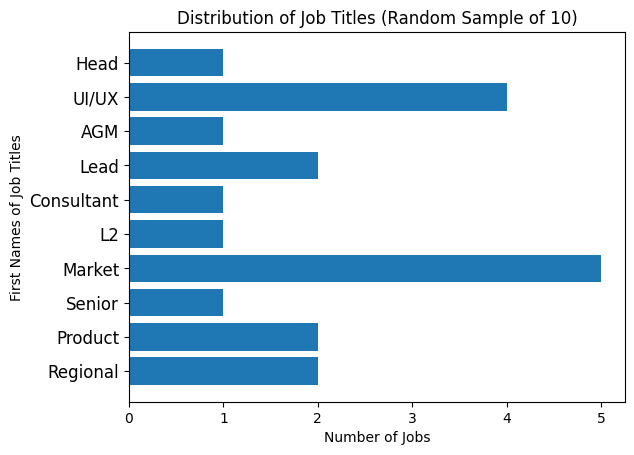

In [6]:
job_title_counts = df['job_title'].value_counts()


sampled_job_titles = df['job_title'].sample(n=10, random_state=42) # select random
first_names = [title.split()[0] for title in sampled_job_titles]


plt.barh(first_names, job_title_counts[sampled_job_titles].values) 
plt.xlabel('Number of Jobs')  
plt.ylabel('First Names of Job Titles') 
plt.title('Distribution of Job Titles (Random Sample of 10)')  
plt.gca().invert_yaxis()  


plt.yticks(range(len(first_names)), first_names, fontsize=12)  

plt.show()

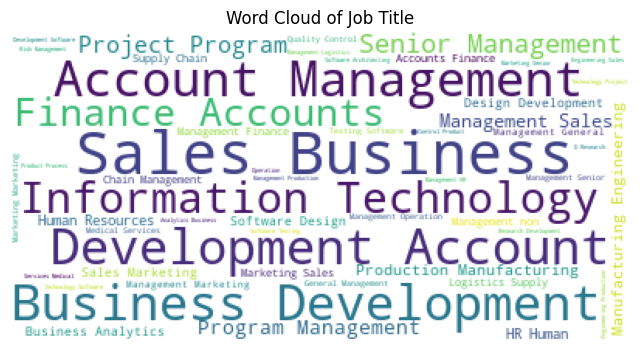

In [7]:
# Import the WordCloud class
import wordcloud
from wordcloud import WordCloud


df['job_title'] = df['job_title'].apply(lambda x: str(x) if isinstance(x, float) else x)

# Textual Data Exploration (Optional, if keeping 'jds')
if 'jds' in df.columns:
    
    wordcloud = WordCloud(background_color='white').generate(' '.join(df['function']))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Word Cloud of Job Title')
    plt.show()


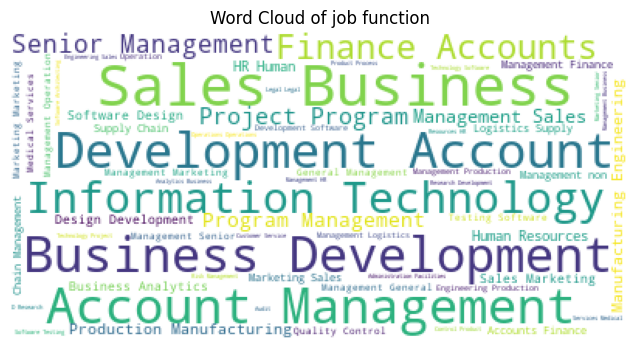

In [8]:


df['function'] = df['function'].apply(lambda x: str(x) if isinstance(x, float) else x)

# Textual Data Exploration (Optional, if keeping 'jds')
if 'jds' in df.columns:
    # Word Cloud (Optional)
    wordcloud = WordCloud(background_color='white').generate(' '.join(df['function']))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Word Cloud of job function')
    plt.show()


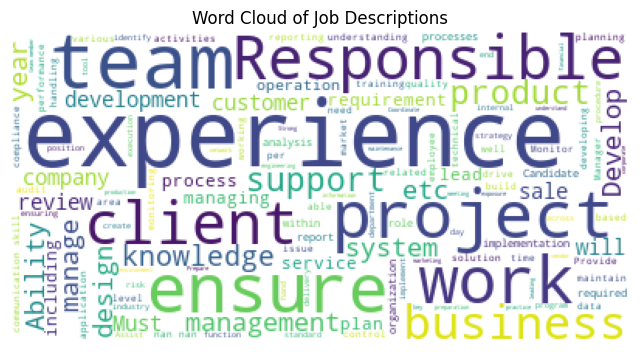

In [9]:


df['jds'] = df['jds'].apply(lambda x: str(x) if isinstance(x, float) else x)

# Textual Data Exploration (Optional, if keeping 'jds')
if 'jds' in df.columns:
    # Word Cloud (Optional)
    wordcloud = WordCloud(background_color='white').generate(' '.join(df['jds']))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Word Cloud of Job Descriptions')
    plt.show()


## Data cleaning and preprocesing

In [10]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='most_frequent')
df['jds_cleaned'] = imputer.fit_transform(df[['jds']])[:, 0]  
# Verify the result
print(df['jds_cleaned'].head())

0                                                  nan
1    10-15 years of experience in a VFX facility Ad...
2    Candidate Should have Strong OO design and pro...
3    Job Description Must have at -least . Years ex...
4    Develop ASP.netweb applicationsPerform unit te...
Name: jds_cleaned, dtype: object


In [11]:
# Check Duplicates
df.duplicated().sum()

1505

In [12]:
# Check for duplicates in specific columns
duplicates_in_columns = df.duplicated(subset=['function', 'job_title', 'jds']).sum()
print("Number of duplicates in specified columns:", duplicates_in_columns)


Number of duplicates in specified columns: 1505


In [13]:

df_cleaned = df.drop_duplicates()

print("Shape after removing duplicates:", df_cleaned.shape)

Shape after removing duplicates: (8640, 4)


In [14]:


## preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)

    # Lowercase, remove punctuation, tokenize
    text = text.lower().replace(r"[^a-zA-Z0-9\s]", "")
    tokens = text.split()

    # Stopword removal and stemming/lemmatization (choose one)
    # Stopword removal with stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Stopword removal with lemmatization (recommended)
    from nltk.stem import WordNetLemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(filtered_tokens)

df['jds_clean'] = df['jds'].apply(preprocess_text)



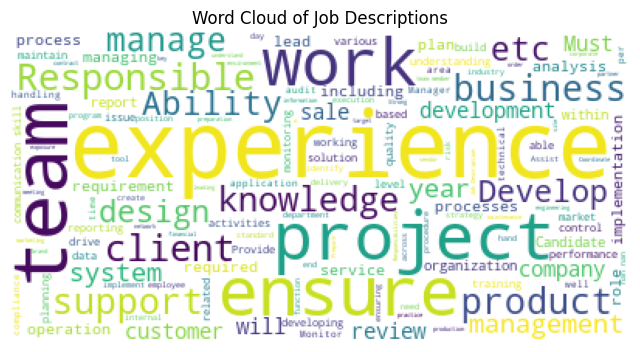

In [15]:
# Textual Data Exploration (Optional, if keeping 'jds_cleaned')
if 'jds_cleaned' in df.columns:
    # Word Cloud (Optional)
    wordcloud = WordCloud(background_color='white').generate(' '.join(df['jds_cleaned']))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Word Cloud of Job Descriptions')
    plt.show()


## Modle Trainng and Evaluation

In [16]:
# Initialize a TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.jds_cleaned).toarray()


features_df = pd.DataFrame(features, columns=tfidf.get_feature_names_out())
preprocessed_df = pd.concat([df.reset_index(drop=True), features_df], axis=1)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Splitting the Data
X = features 
y = df['job_title'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Model Selection and Training
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [20]:
# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  
print("F1 Score:", f1)


Accuracy: 0.22227698373583046
F1 Score: 0.20650096546010713


In [21]:
# Classification Report
print(classification_report(y_test, y_pred))

                                                                                                                         precision    recall  f1-score   support

                                                                                             .NET Lead - Airline Domain       0.00      0.00      0.00         0
                                                                                                   .NET Lead/ Architect       1.00      1.00      1.00         1
                                                                                                .Net Developer - C#/asp       0.00      0.00      0.00         0
                                                                                .Net Tester - Manual/Automation Testing       0.00      0.00      0.00         0
                                                                                                3D Animator/ 3D Modeler       0.00      0.00      0.00         1
                                 

/Users/pradhyumnyadav/Desktop/assign_sec/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pradhyumnyadav/Desktop/assign_sec/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pradhyumnyadav/Desktop/assign_sec/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

In [22]:
# Feature Importance
feature_importance = model.feature_importances_
feature_names = tfidf.get_feature_names_out()
important_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Important Features:")
for feature in important_features:
    print(feature)

Top 10 Important Features:
('experience', 0.0017591732586769923)
('management', 0.0013367471388851429)
('development', 0.0012453777415340236)
('team', 0.0012020486178910942)
('years', 0.001191415653159242)
('knowledge', 0.0011441272048717517)
('business', 0.0011059287401244708)
('skills', 0.0010546736409585637)
('job', 0.0009773524825689322)
('work', 0.0009663069585794295)
